In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [10]:
l = 100
n = 20
g = 2.

In [11]:
x = np.sign(np.random.rand(l,n)-0.5)
w0 = np.random.normal(0.,g/np.sqrt(n),size=n)
h = x.dot(w0)

In [12]:
x_av = np.mean(x,axis=0)
dx = x - x_av
c = np.cov(dx,rowvar=False,bias=True)
#c += regu*np.identity(n)
c_inv = linalg.inv(c)

In [13]:
# find w from h    
h_av = h.mean()
dh = h - h_av 
dhdx = dh[:,np.newaxis]*dx[:,:]

dhdx_av = dhdx.mean(axis=0)
w = c_inv.dot(dhdx_av)

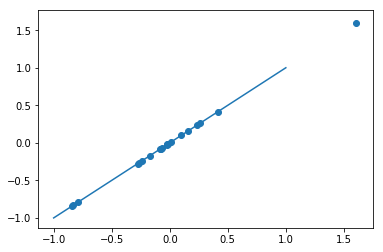

In [14]:
plt.plot([-1,1],[-1,1])
plt.scatter(w0,w)

## SVD based

In [15]:
u,s,vt = np.linalg.svd(c, full_matrices=True)

In [16]:
print(u.shape,s.shape,vt.shape)

((20, 20), (20,), (20, 20))


In [17]:
s_inv = s.copy()
s_zeros = np.isclose(s_inv,0)
s_inv[s_zeros] = 0
s_inv[~s_zeros] = 1./s_inv[~s_zeros]

In [18]:
c_inv = np.multiply(vt.T,s_inv)

In [19]:
c_inv = c_inv.dot(u.T)

In [20]:
w = c_inv.dot(dhdx_av)

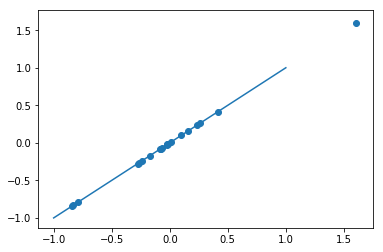

In [21]:
plt.plot([-1,1],[-1,1])
plt.scatter(w0,w)

In [19]:
### test
smat = np.zeros((l,n))
smat[:n,:] = np.diag(s)

xtest = u.dot(smat)